In [1]:
from cdt.independence.graph import Glasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy.linalg as la
from sklearn.covariance import EmpiricalCovariance, graphical_lasso, GraphicalLassoCV
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import networkx as nx
import matplotlib.pyplot as plt

Detecting 1 CUDA devices.


In [2]:
with open('data/data_fill.pkl','rb') as f:
    data_fill_list = pickle.load(f)

    

In [3]:
## Glasso
emp = EmpiricalCovariance()
mrfs_list = []
lambda_list = []
## Do lambda search on each and choose best
for data_fill in tqdm_notebook(data_fill_list):
    emp.fit(data_fill)
    cov = emp.covariance_
    ## Use CV to find best
    gcv = GraphicalLassoCV(cv = 3, alphas = 20)
    gcv.fit(data_fill.values)
    ind_best = gcv.grid_scores_.mean(1).argmax()
    lambda_best = gcv.cv_alphas_[ind_best]
    gl = Glasso()
    graph = gl.predict(data_fill, alpha = lambda_best)
    mrf = nx.adjacency_matrix(graph).todense()
    mrfs_list.append(mrf)
    lambda_list.append(lambda_best)

Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
graphical_lasso: did not converge after 100 iteration: dual gap: -4.637e-04
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
graphical_lasso: did not converge after 2000 iteration: dual gap: -4.556e-04
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
invalid value encountered in multiply
invalid value encountered in multiply
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.
invalid value e

Class GraphLasso is deprecated; The 'GraphLasso' was renamed to 'GraphicalLasso' in version 0.20 and will be removed in 0.22.


In [4]:
lambda_list

[3.806530007285974,
 47.86625055495572,
 2.690390402148669,
 169.85155111096933,
 9.737905466346133,
 11.922299347188394,
 5.654985994178082,
 0.30154614414545994,
 171.47780828562955,
 7.503803775220961]

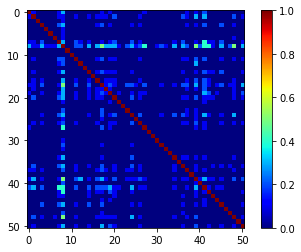

In [5]:
freqs = np.array([mrf.astype(bool) for mrf in mrfs_list]).mean(0)
plt.imshow(freqs,cmap='jet')
plt.colorbar()

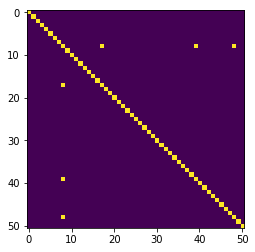

In [6]:
mrf_tot = (freqs>=.5).astype(int)
plt.imshow(mrf_tot)

In [7]:
#Check out off diagonal ones
ones = np.argwhere(mrf_tot)
for one in ones:
    if one[0] >= one[1]:
        continue
    #only get one triangle
    else:
        first = data_fill.columns[one[0]]
        second = data_fill.columns[one[1]]
        print('{}, {}'.format(first,second))

District of Columbia, Kentucky
District of Columbia, Rhode Island
District of Columbia, West Virginia


In [8]:
## Fairly non sensical, will save anyway
np.save('data/mrf.npy',mrf_tot)